In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # импортируйте нужные библиотеки


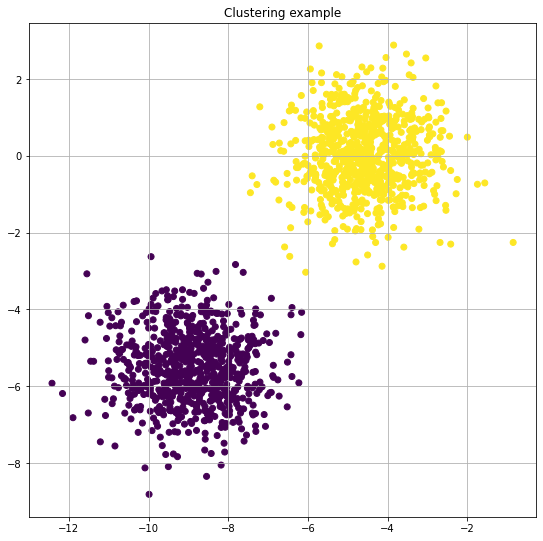

In [2]:

# сгенерируйте линейно разделимую выборку для задачи бинарной классификации

plt.figure(figsize=(20, 20))

n_samples = 1500
random_state = 170

X_varied, y_varied = make_blobs(
    n_samples=n_samples, centers=2, random_state=random_state
)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Clustering example")
plt.grid()

plt.show()


# Логистическая регрессия

Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу. \
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
<p style="text-align: center;"> $f(z) = \dfrac{1}{1 + e^{-z}}$ </p>

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида:

<p style="text-align: center;"> $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 + ... + w_mx_m}}$ </p>

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
<p style="text-align: center;"> $-\sum\limits_{i=1}^{n}(y_ilog(a_i) + (1 - y_i)log(1 - a_i))$ </p>
где $a_i = a(w, x_i)$

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)

In [16]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/nastymauz/yandex_course/blob/main/tink1.jpg?raw=true")


In [17]:
Image(url= "https://github.com/nastymauz/yandex_course/blob/main/tink2.jpg?raw=true")

#### Задание №2. Напишите собственную логистическую регрессию

In [3]:
from sklearn.linear_model import LogisticRegression
class MyLogRegression():
    
    def __init__(self, batch_size=25, num_steps=350, lr=1e-2):
        # Задаем гиперпараметры
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr


    def fit(self, X, y):
      # Метод обучения модели
        X1 = np.hstack([np.ones((X.shape[0], 1)), X])
        w = np.random.randn(X.shape[-1]+1)
        for i in range(self.num_steps):
            w -= self.lr*self.grad(X1, y, w)
        self.w = w
        return self.w

    def predict(self, X):
        # Метод предсказания модели
        X1 = np.hstack([np.ones((X.shape[0], 1)), X])
        return (self.sigm(X1 @ self.w)>=0.5)
    
    def sigm(self, z):
        return 1/(1+np.exp(-z))

    def grad(self, X, y, w):
        return X.T@(self.sigm(X @ w)-y)

    def loss(self, y, a):
        return -(y*np.log(a)+(1-y)*np.log(1-a))    


#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_varied, y_varied)

In [5]:
# Моя логистическая регрессия
logReg = MyLogRegression()
logReg.fit(X_train, y_train)
my_res = logReg.predict(X_test)
print("Моя логистическая регрессия: ", accuracy_score(my_res, y_test))



Моя логистическая регрессия:  1.0


In [6]:
# Логистическая регрессия из sklearn
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
res = clf.predict(X_test)
print("Логистическая регрессия из sklearn: ", clf.score(X_test, y_test))

Логистическая регрессия из sklearn:  1.0
